# Métodos de agrupación

Veamos en este cuaderno algunas implementaciones de los métodos empleados en el análisis de conglomerados.

## Métodos Jerárquicos

*Aglomerativos*

In [7]:
data(USArrests)
datos <- scale(USArrests)

# Matriz de distancias euclídeas
mat_dist <- dist(x = datos, method = "euclidean")


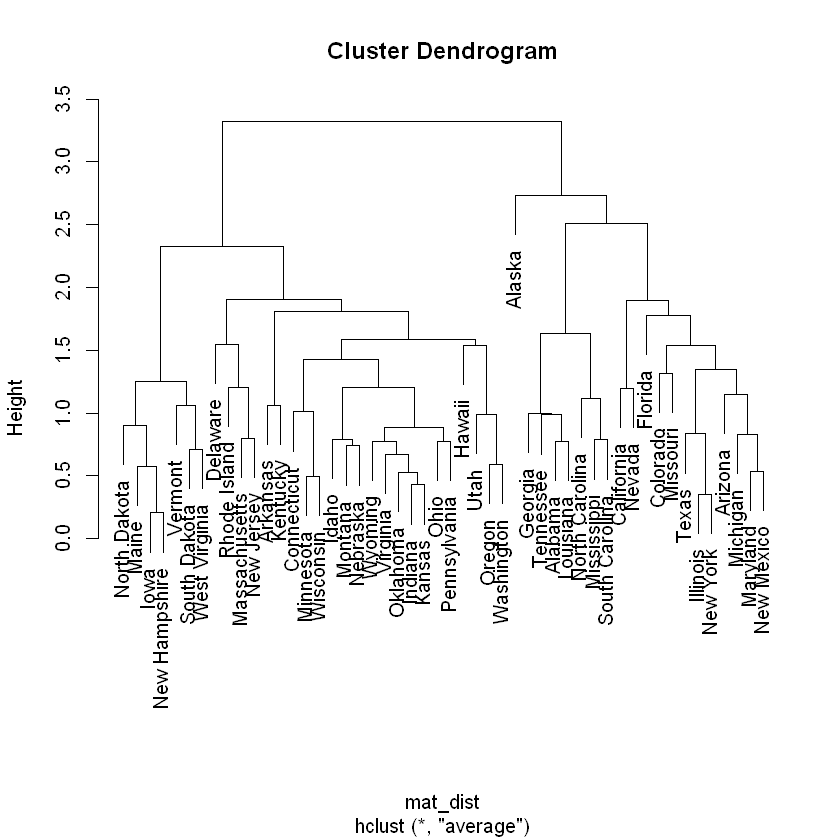

In [13]:
# Dendrogramas con linkage complete y average
hc_euclidea_complete <- hclust(d = mat_dist, method = "complete")
hc_euclidea_average  <- hclust(d = mat_dist, method = "average")
plot(hc_euclidea_average)

In [8]:
cor(x = mat_dist, cophenetic(hc_euclidea_complete))

[1] 0.6979437

In [9]:
cor(x = mat_dist, cophenetic(hc_euclidea_average))

[1] 0.7180382

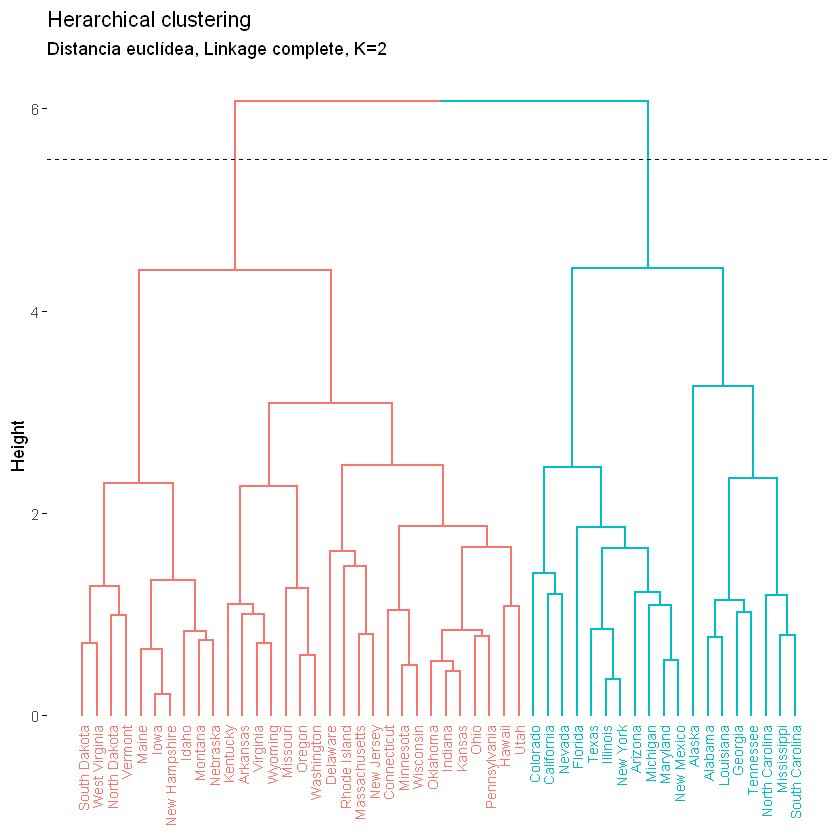

In [14]:
library(ggplot2)
library(factoextra)
set.seed(101)


fviz_dend(x = hc_euclidea_complete, k = 2, cex = 0.6) +
  geom_hline(yintercept = 5.5, linetype = "dashed") +
  labs(title = "Herarchical clustering",
       subtitle = "Distancia euclídea, Linkage complete, K=2")

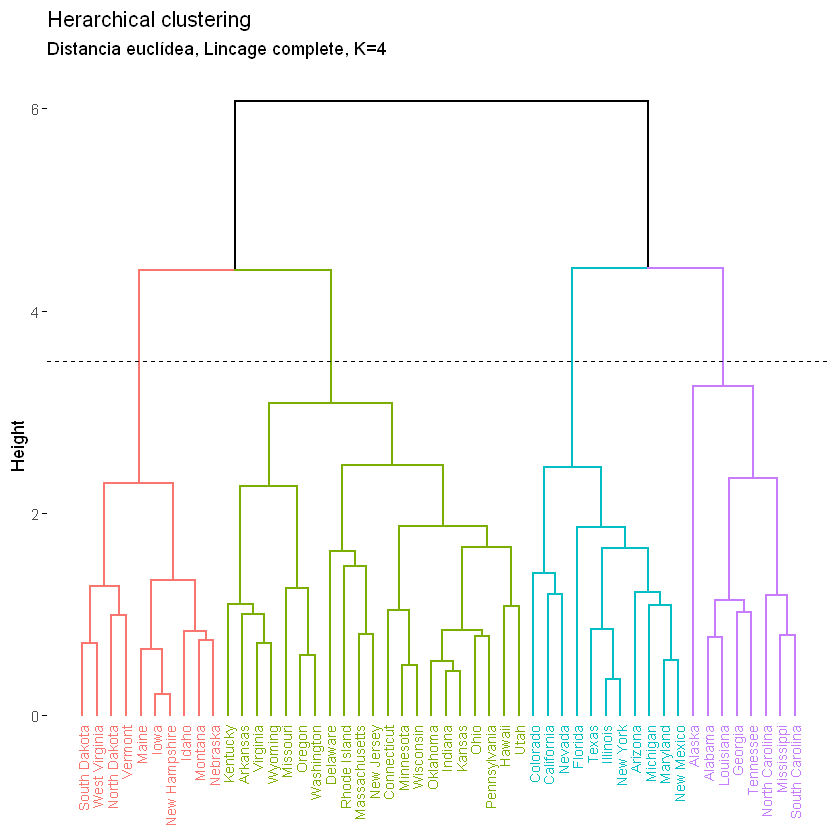

In [18]:
fviz_dend(x = hc_euclidea_completo, k = 4, cex = 0.6) +
  geom_hline(yintercept = 3.5, linetype = "dashed") +
  labs(title = "Herarchical clustering",
       subtitle = "Distancia euclídea, Lincage complete, K=4")


Usando poligonos

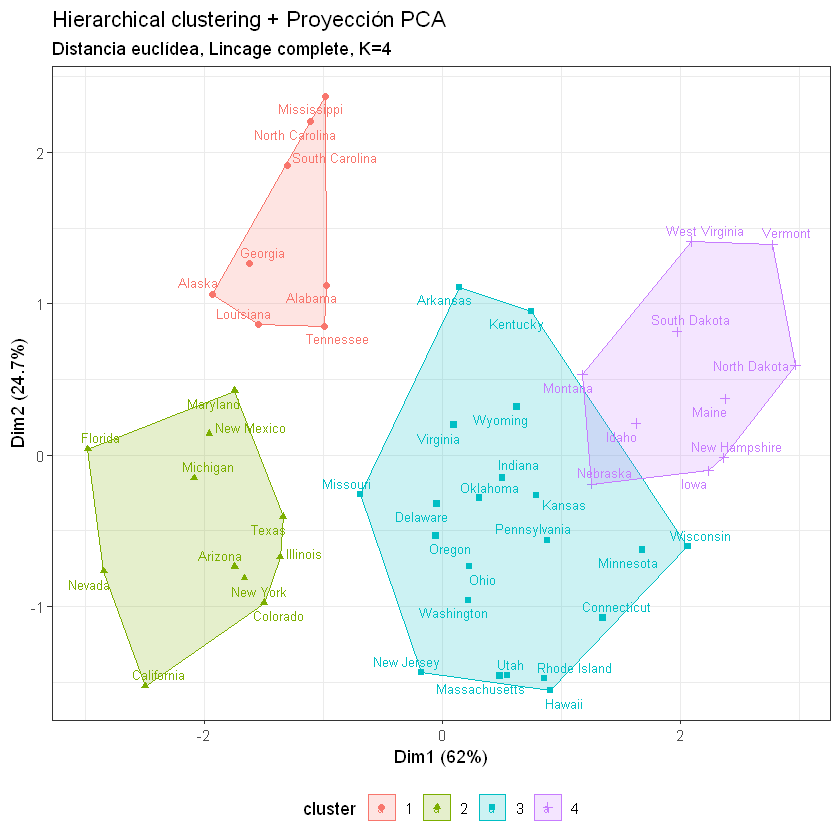

In [16]:
fviz_cluster(object = list(data=datos, cluster=cutree(hc_euclidea_completo, k=4)),
             ellipse.type = "convex", repel = TRUE, show.clust.cent = FALSE,
             labelsize = 8)  +
  labs(title = "Hierarchical clustering + Proyección PCA",
       subtitle = "Distancia euclídea, Lincage complete, K=4") +
  theme_bw() +
  theme(legend.position = "bottom")

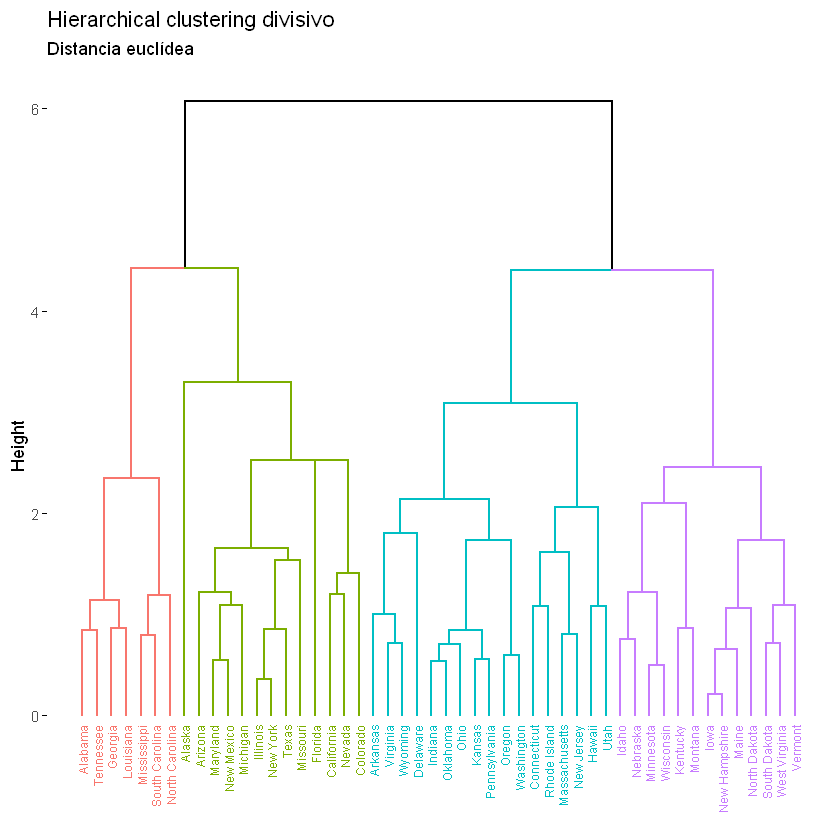

In [22]:
library(cluster)
hc_diana <- diana(x = mat_dist, diss = TRUE, stand = FALSE)

fviz_dend(x = hc_diana, cex = 0.5,k=4) +
  labs(title = "Hierarchical clustering divisivo",
       subtitle = "Distancia euclídea")